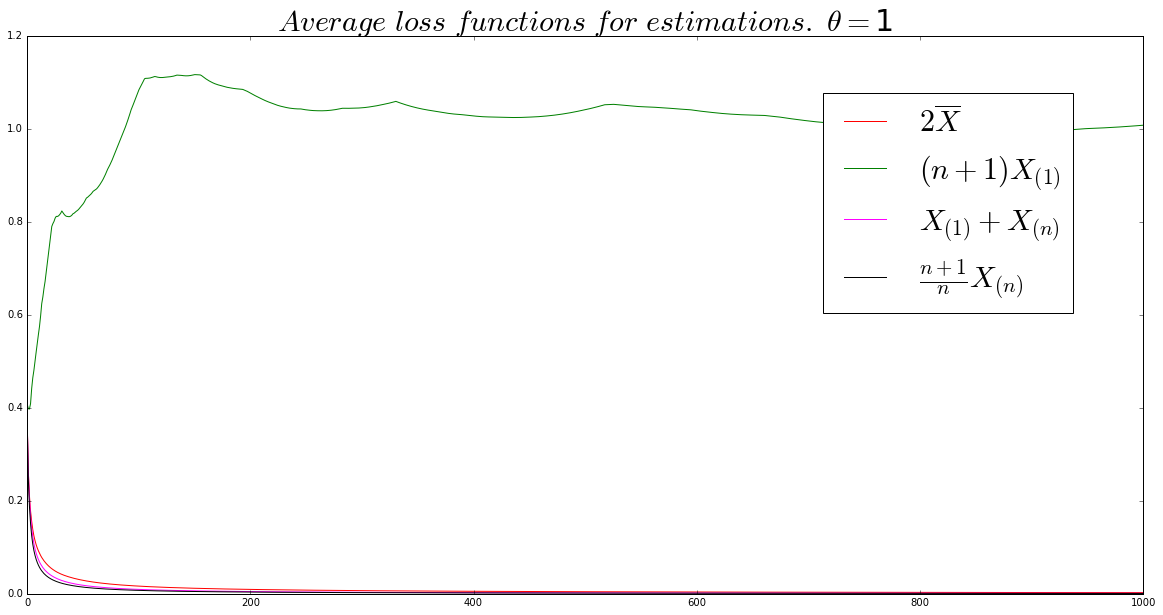

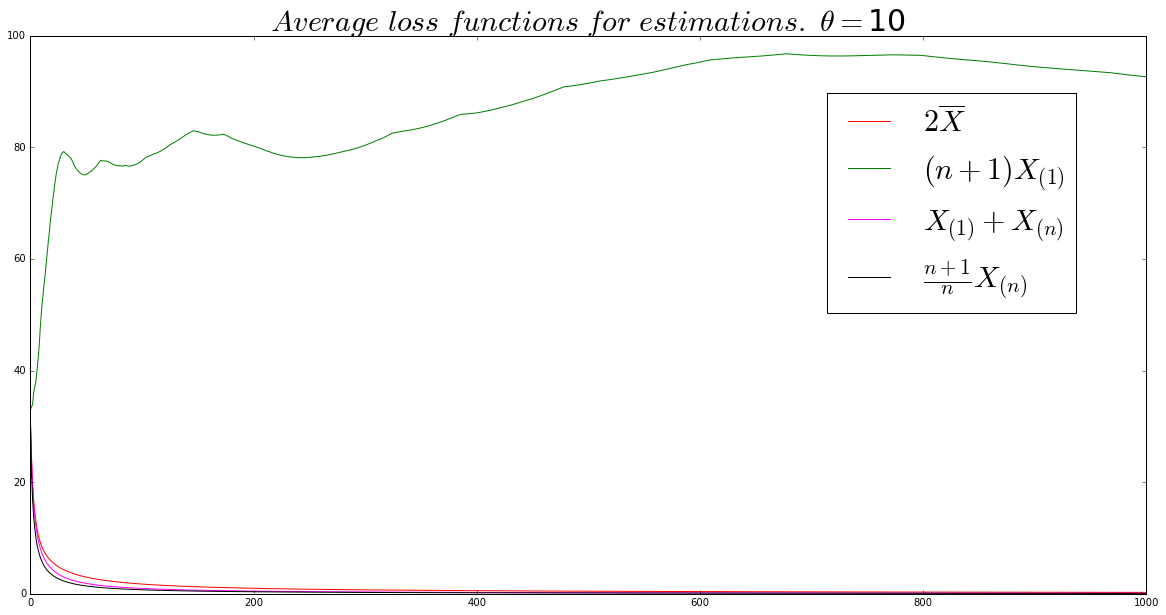

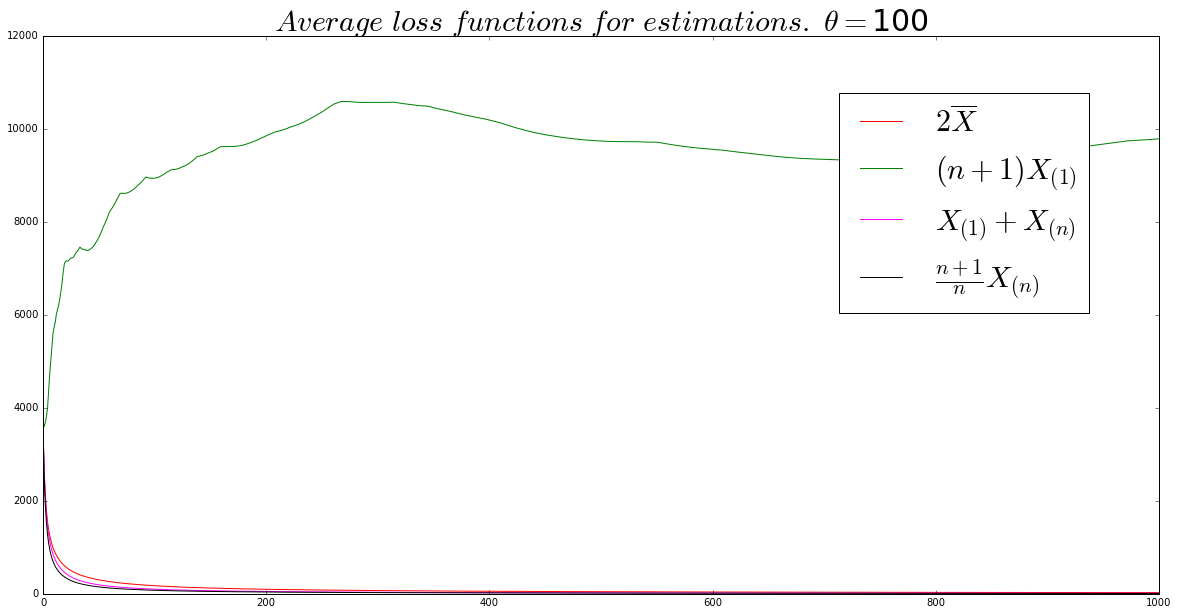

In [9]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

M = 100
N = 1000;

Theta = [1, 10, 100]
Selections = []

for theta in Theta :
    ourSelection = sps.uniform.rvs(size=N*M, loc=0, scale=theta);
    ourSelection = ourSelection.reshape(M, N);
    
    # estimationI -  I-я оценка параметра тета
    estimation1 = np.array(ourSelection)
    estimation2 = np.array(ourSelection)
    estimation3 = np.array(ourSelection)
    estimation4 = np.array(ourSelection)

    # squaredLossI -  I-я квадратичная функция потерь оценки параметра тета
    squaredLoss1 = np.array(ourSelection)
    squaredLoss2 = np.array(ourSelection)
    squaredLoss3 = np.array(ourSelection)
    squaredLoss4 = np.array(ourSelection)
    
    
    #mean
#    meanFrom0_to_n1 = np.array(ourSelection)
#    meanFrom0_to_n2 = np.array(ourSelection)
#    meanFrom0_to_n3 = np.array(ourSelection)
#    meanFrom0_to_n4 = np.array(ourSelection)

    meanByM1 = np.zeros(N)
    meanByM2 = np.zeros(N)
    meanByM3 = np.zeros(N)
    meanByM4 = np.zeros(N)
    
    for m in range(0, M) :
        ourSum = 0;
        ourMin = ourSelection[m][0];
        ourMax = ourSelection[m][0];
        
        sum1 = 0
        sum2 = 0
        sum3 = 0
        sum4 = 0
        
        for n in range(0, N) :
            ourSum += ourSelection[m][n];
            ourMin = min(ourMin, ourSelection[m][n]);
            ourMax = max(ourMax, ourSelection[m][n]);
            ourMean = ourSum / (n+1);
            estimation1[m][n] = (2*ourMean);
            estimation2[m][n] = ((n+1)*ourMin);
            estimation3[m][n] = (ourMin + ourMax);
            estimation4[m][n] = ((n+2)/(n+1)*ourMax);

            
            squaredLoss1[m][n] = ((2*ourMean - theta)**2);
            squaredLoss2[m][n] = (((n+1)*ourMin - theta)**2);
            squaredLoss3[m][n] = ((ourMin + ourMax - theta)**2)
            squaredLoss4[m][n] = (((n+2)/(n+1)*ourMax - theta)**2)
            
            sum1 += ((2*ourMean - theta)**2)
            sum2 += (((n+1)*ourMin - theta)**2)
            sum3 += ((ourMin + ourMax - theta)**2)
            sum4 += (((n+2)/(n+1)*ourMax - theta)**2)
            
            mean1 = sum1 / (n + 1)
            mean2 = sum2 / (n + 1)
            mean3 = sum3 / (n + 1)
            mean4 = sum4 / (n + 1)
            
            #meanFrom0_to_n1[m][n] = mean1;
            meanByM1[n] += mean1
            meanByM2[n] += mean2
            meanByM3[n] += mean3
            meanByM4[n] += mean4
            #meanByM2.append(np.mean(squaredLoss1, axis=0));      
    meanByM1 /= M;
    meanByM2 /= M;
    meanByM3 /= M;
    meanByM4 /= M;

    plt.figure(figsize=(20,10))
    #plt.ylim(0, theta/30)
    plt.title('$Average\ loss\ functions\ for\ estimations.\ \\theta = $' + str(theta), fontsize = 30);
    plt.plot(np.linspace(0, N, N), meanByM1, color = 'red', label='$2\overline{X}$');
    plt.plot(np.linspace(0, N, N), meanByM2, color = 'green', label='$(n+1)X_{(1)}$')
    plt.plot(np.linspace(0, N, N), meanByM3, color = 'magenta', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.linspace(0, N, N), meanByM4, color = 'black', label = '$\\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylabel('$Shift$', fontsize = 50);
    plt.show()

## As we can see, the second estimation is the least effective if we compare it to others. Let's exclude it from graphs!

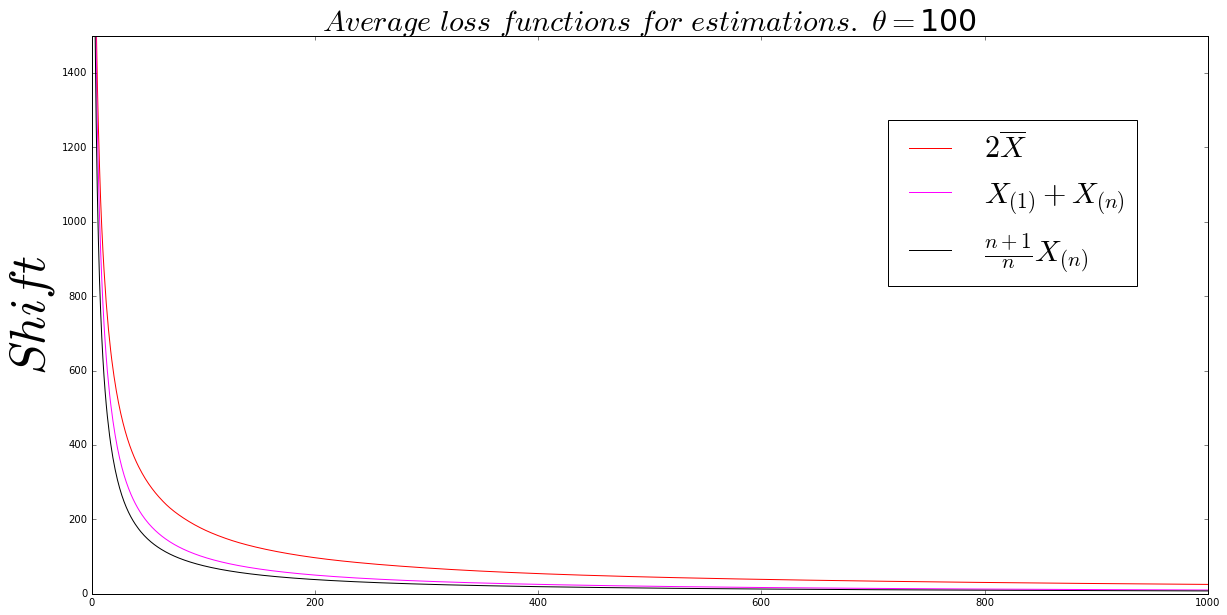

In [12]:
    plt.figure(figsize=(20,10))
    plt.ylim(0, 1500)
    plt.title('$Average\ loss\ functions\ for\ estimations.\ \\theta = $' + str(theta), fontsize = 30);
    plt.plot(np.linspace(0, N, N), meanByM1, color = 'red', label='$2\overline{X}$');
    plt.plot(np.linspace(0, N, N), meanByM3, color = 'magenta', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.linspace(0, N, N), meanByM4, color = 'black', label = '$\\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylabel('$Shift$', fontsize = 50);
    plt.show()

##  Also, the squared loss function is always approximately remains the same regarding to the theta.